In [4]:
pip install opencv-python numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

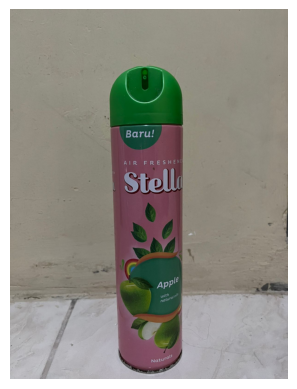

In [34]:
image = cv2.imread('stella1.jpg')  # Ganti dengan path gambar Anda
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

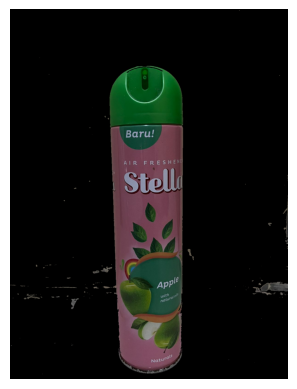

In [35]:
# Konversi gambar menjadi citra biner menggunakan metode Thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 2, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Buat kontur dari citra biner
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Buat masker kosong dengan ukuran yang sama dengan gambar
mask = np.zeros(image.shape[:2], np.uint8)

# Gambar kontur pada masker
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Gabungkan gambar asli dengan masker menggunakan operator bitwise AND
image_without_bg = cv2.bitwise_and(image, image, mask=mask)

# Tampilkan gambar hasil penghapusan latar belakang
image_without_bg_rgb = cv2.cvtColor(image_without_bg, cv2.COLOR_BGR2RGB)
plt.imshow(image_without_bg_rgb)
plt.axis('off')
plt.show()


In [36]:
cv2.imwrite('stella1.png', image_without_bg)  # Ganti dengan path tujuan Anda

True